<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
# for knowing the columns
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# TASK 2

# Boxplot for "Median value of owner-occupied homes" (MEDV)

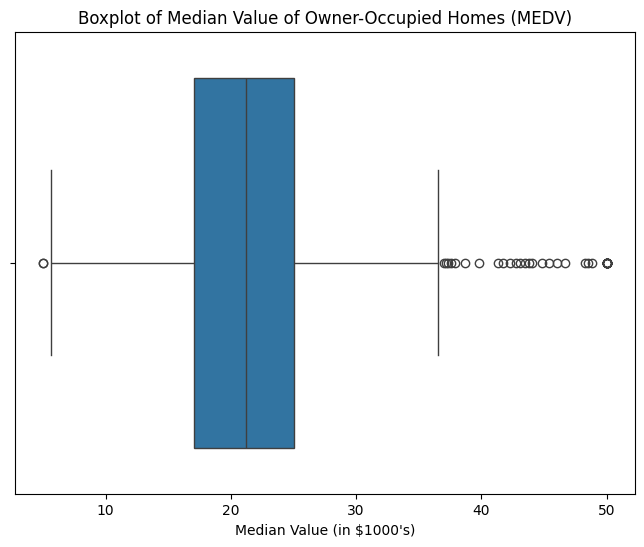

In [4]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value (in $1000\'s)')
plt.show()

# Bar plot for the Charles River variable (CHAS)

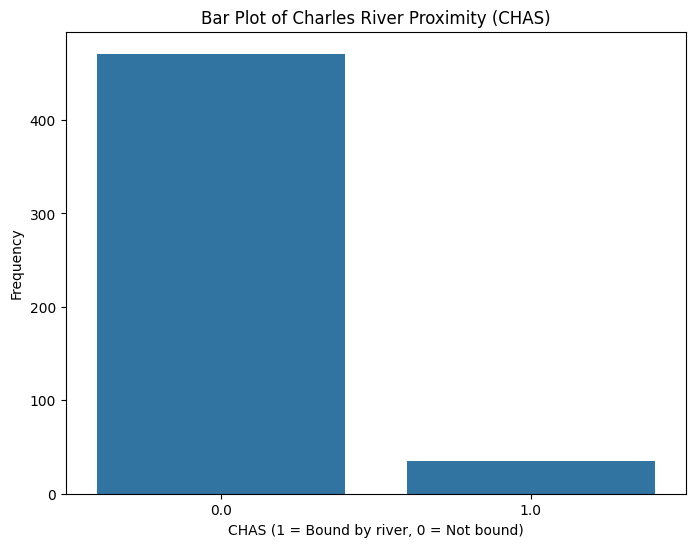

In [5]:

plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Proximity (CHAS)')
plt.xlabel('CHAS (1 = Bound by river, 0 = Not bound)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of MEDV vs Discretized AGE

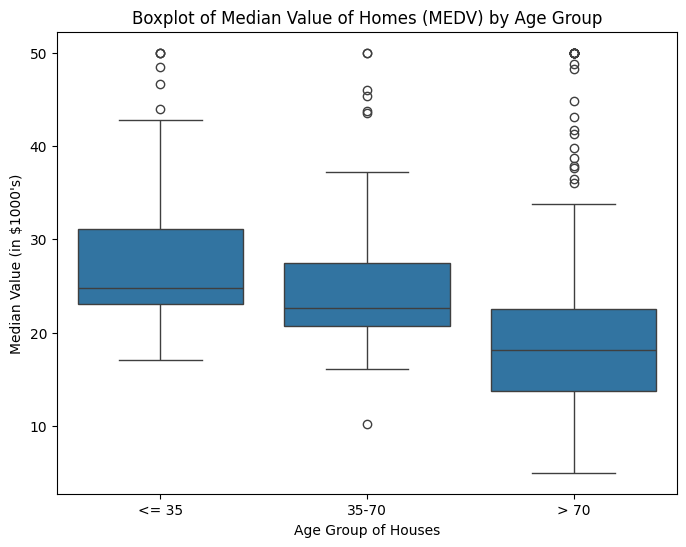

In [6]:

# Discretize AGE into three groups: <= 35, 35-70, >70
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<= 35', '35-70', '> 70'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Homes (MEDV) by Age Group')
plt.xlabel('Age Group of Houses')
plt.ylabel('Median Value (in $1000\'s)')
plt.show()

# Scatter plot for Nitric Oxide concentration (NOX) vs proportion of non-retail business acres (INDUS)

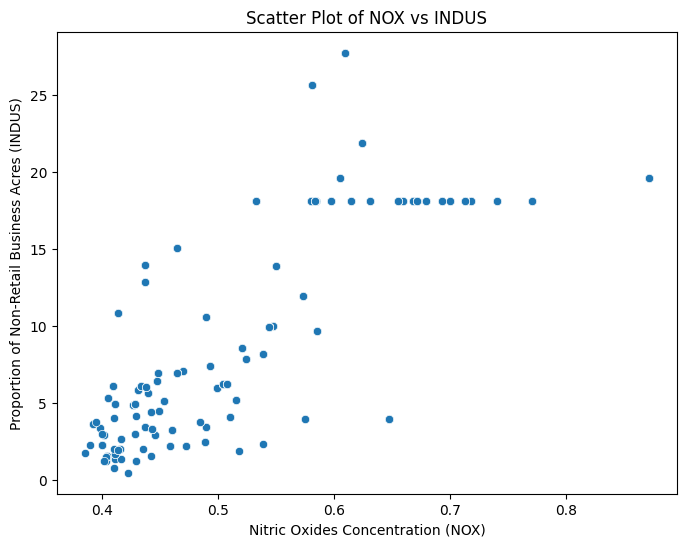

In [7]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitric Oxides Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

# Histogram for the pupil-to-teacher ratio (PTRATIO)

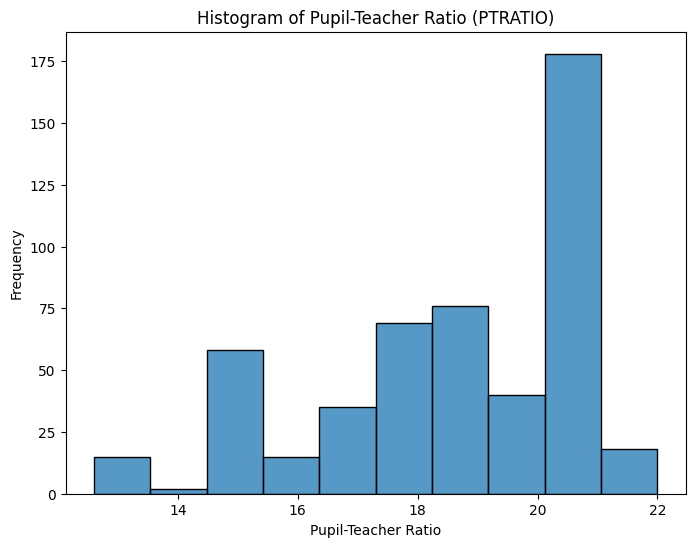

In [8]:

plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=False)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# TASK 3

# T-test for independent samples

# Hypothesis:
H0: There is no significant difference in MEDV between houses bounded by the Charles River and those not bounded.

H1: There is a significant difference in MEDV between houses bounded by the Charles River and those not bounded.

In [9]:
import scipy.stats as stats
chas_bound = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_not_bound = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(chas_bound, chas_not_bound)

print("T-test for independent samples")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-test for independent samples
T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


Conclusion:

In [10]:

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis (H0). There is a significant difference in median house values based on proximity to the Charles River.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). There is no significant difference in house values based on proximity to the Charles River.")

Conclusion: Reject the null hypothesis (H0). There is a significant difference in median house values based on proximity to the Charles River.


# One-way ANOVA (AGE groups vs MEDV)

# Hypothesis:
H0: There is no significant difference in the median value of houses across different age groups.

H1: There is a significant difference in the median value of houses across different age groups.

In [12]:

boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<= 35', '35-70', '> 70'])
model = ols('MEDV ~ C(AGE_Group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nANOVA for Age Groups and MEDV")
print(anova_table)


ANOVA for Age Groups and MEDV
                    sum_sq     df         F        PR(>F)
C(AGE_Group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


Conclusion:

In [13]:

if anova_table['PR(>F)'][0] < 0.05:
    print("Conclusion: Reject the null hypothesis (H0). There is a significant difference in median house values across different age groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). There is no significant difference in median house values across different age groups.")


Conclusion: Reject the null hypothesis (H0). There is a significant difference in median house values across different age groups.


C:\Users\anshika.s\AppData\Local\Temp\ipykernel_10644\4279115081.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


# Pearson correlation (NOX vs INDUS)

# Hypothesis:
H0: There is no correlation between Nitric Oxide concentration (NOX) and the proportion of non-retail business acres per town (INDUS).

H1: There is a correlation between Nitric Oxide concentration (NOX) and the proportion of non-retail business acres per town (INDUS).

In [14]:

correlation, p_value_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("\nPearson Correlation between NOX and INDUS")
print(f"Correlation: {correlation}, P-value: {p_value_corr}")


Pearson Correlation between NOX and INDUS
Correlation: 0.763651446920915, P-value: 7.913361061241532e-98


Conclusion

In [15]:
if p_value_corr < 0.05:
    print("Conclusion: Reject the null hypothesis (H0). There is a significant correlation between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). There is no significant correlation between NOX and INDUS.")


Conclusion: Reject the null hypothesis (H0). There is a significant correlation between NOX and INDUS.


# Linear regression (DIS vs MEDV)

# Hypothesis:
H0: The weighted distance to Boston employment centers (DIS) has no significant impact on the median value of houses (MEDV).

H1: The weighted distance to Boston employment centers (DIS) has a significant impact on the median value of houses (MEDV).


In [16]:

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
print("\nRegression Analysis: DIS vs MEDV")
print(model.summary())


Regression Analysis: DIS vs MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        18:33:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3

# Explanation of the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes


Coefficient for DIS:

The DIS coefficient represents the impact of an additional unit of weighted distance to Boston employment centers on the median value of owner-occupied homes (MEDV).
For example, if the coefficient is -1.0, it means that for every additional unit of distance from employment centers, the median home value decreases by approximately $1,000 (since MEDV is in thousands of dollars).
Conclusion Based on p-value:

If the p-value for the DIS coefficient is less than 0.05, we reject the null hypothesis and conclude that an additional unit of distance to the employment centers has a significant impact on the median value of homes.
If the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning there is no significant impact of distance on home values.

Conclusion:

In [17]:

p_value_dis = model.pvalues['DIS']

if p_value_dis < 0.05:
    print("Conclusion: Reject the null hypothesis (H0). The weighted distance to Boston employment centers has a significant impact on the median value of houses.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). The weighted distance to Boston employment centers has no significant impact on the median value of houses.")

Conclusion: Reject the null hypothesis (H0). The weighted distance to Boston employment centers has a significant impact on the median value of houses.


# Note

Each and every task has its *Hypothesis* and *Conclusion*